<a href="https://colab.research.google.com/github/purin96/Data-Science-Projects-2024/blob/main/pima_classification_baseline_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [642]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [643]:
pwd

'/content'

In [644]:
df=pd.read_csv("./sample_data/diabetes.csv")
df.shape

(768, 9)

In [645]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4. 수치형 변수를 범주형 변수로 만들기


In [646]:
df["Pregnancies_high"]=  df["Pregnancies"] > 6
df[["Pregnancies","Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [647]:
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age","Age_high"]].head()

,Age,Age_high
0,50,False
1,31,False
2,32,False
3,21,False
4,33,False


<Axes: xlabel='Age_high', ylabel='count'>

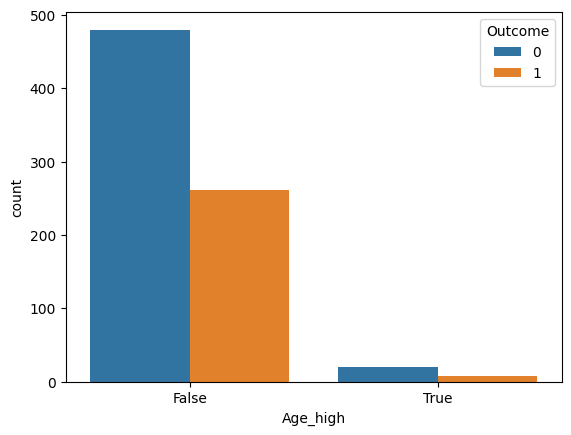

In [648]:
sns.countplot(data=df,x="Age_high",hue="Outcome")

# 결측치 다루기

In [649]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [650]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [651]:
df["Insulin_nan"] = df["Insulin"].replace(0,np.nan)
df[["Insulin","Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [652]:
df["Insulin_nan"].isnull().sum()

374

In [653]:
#결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [654]:
df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean","median"])

<ipython-input-654-a376d5c56528>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin","Insulin_nan"].agg(["mean","median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [655]:
#결측치 채우기
df.loc[(df["Outcome"]==1) & (df["Insulin_nan"]).isnull(),"Insulin_nan"] =169.5
df.loc[(df["Outcome"]==0) & (df["Insulin_nan"]).isnull(),"Insulin_nan"]=102.5

#6.왜도, 척도

<ipython-input-656-6e0ff4dc35a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.loc[df["Insulin"]>0,"Insulin"]+1))


<Axes: xlabel='Insulin', ylabel='Density'>

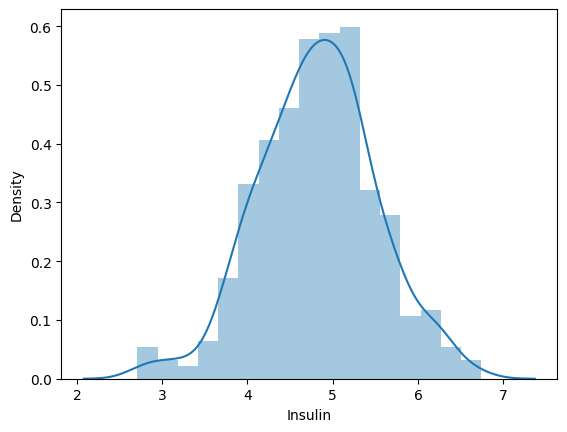

In [656]:
sns.distplot(np.log(df.loc[df["Insulin"]>0,"Insulin"]+1))

<ipython-input-657-1a25c53d9892>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_nan"])


<Axes: xlabel='Insulin_nan', ylabel='Density'>

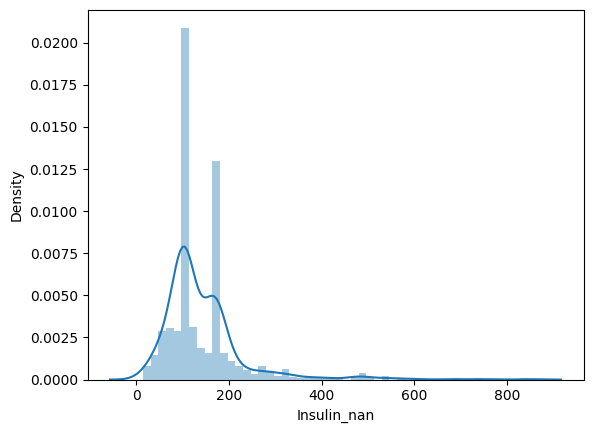

In [657]:
sns.distplot(df["Insulin_nan"])

<ipython-input-658-038cab0b4bda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Insulin_log"])


<Axes: xlabel='Insulin_log', ylabel='Density'>

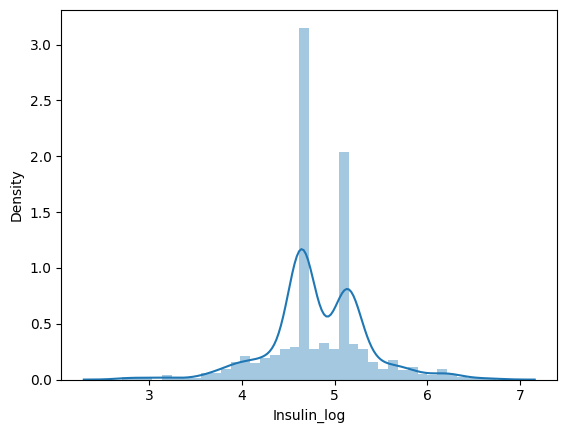

In [658]:
df["Insulin_log"] = np.log(df["Insulin_nan"]+1)
sns.distplot(df["Insulin_log"])

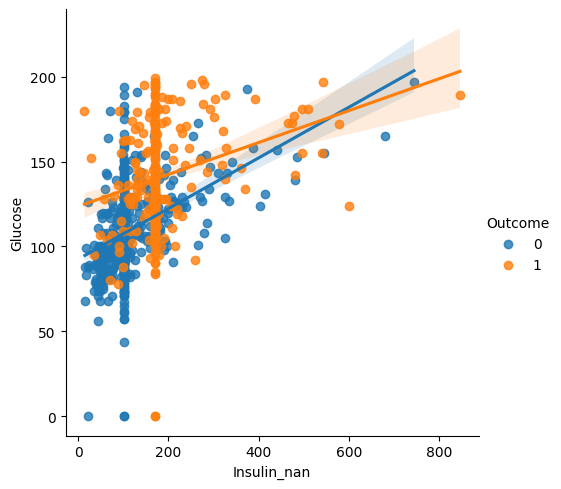

In [659]:
sns.lmplot(data=df,x="Insulin_nan", y="Glucose",hue="Outcome")

In [660]:
df["low_glu_insulin"] = (df["Glucose"] <100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [661]:
#crosstab : 범주형 변수에 대해 crosstab
pd.crosstab(df["Outcome"],df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


#4.5 이상치 다루기

<Axes: ylabel='Insulin_nan'>

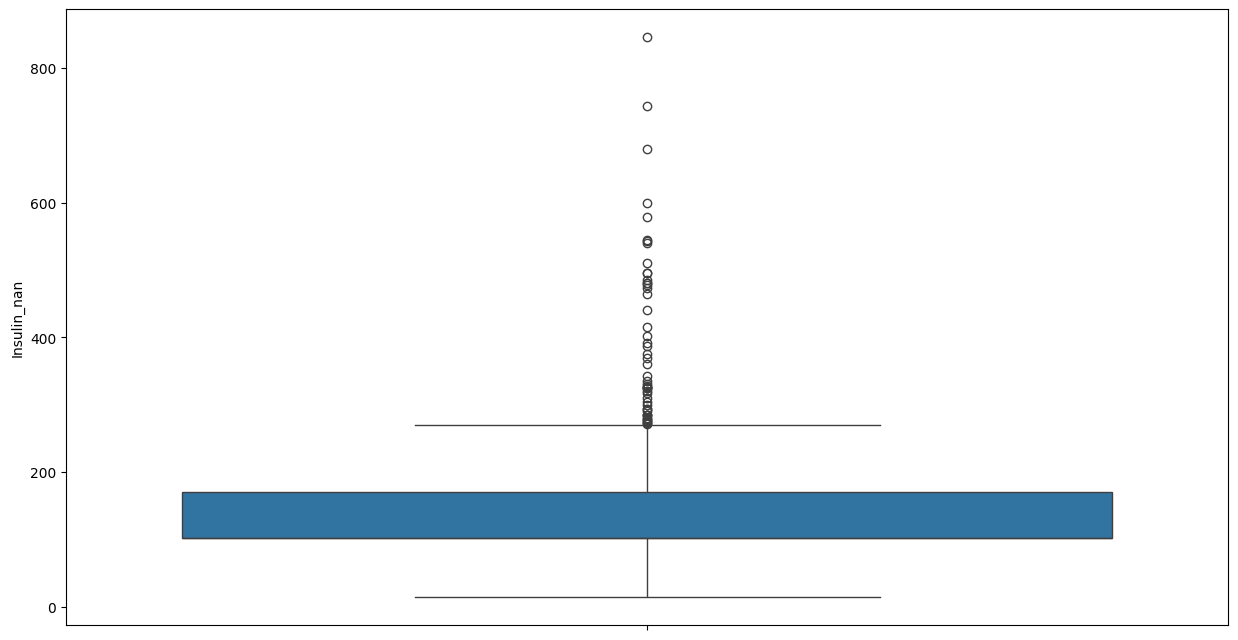

In [662]:
plt.figure(figsize=(15,8))
sns.boxplot(df["Insulin_nan"])

In [663]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [664]:
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [665]:
OUT = IQR3 + (IQR*1.5)
OUT

270.0

In [666]:
df[df["Insulin_nan"]>OUT].shape

(51, 16)

In [667]:
df[df["Insulin_nan"]>600].shape

(3, 16)

In [668]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,0,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False


#4.6 스케일링

In [669]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["DiabetesPedigreeFunction","Glucose"]])
scale = scaler.transform(df[["DiabetesPedigreeFunction","Glucose"]])
scale

array([[ 0.46849198,  0.84832379],
       [-0.36506078, -1.12339636],
       [ 0.60439732,  1.94372388],
       ...,
       [-0.68519336,  0.00330087],
       [-0.37110101,  0.1597866 ],
       [-0.47378505, -0.8730192 ]])

In [670]:
# df[["DiabetesPedigreeFunction","Glucose"]] = scale
# df[["DiabetesPedigreeFunction","Glucose"]].head()

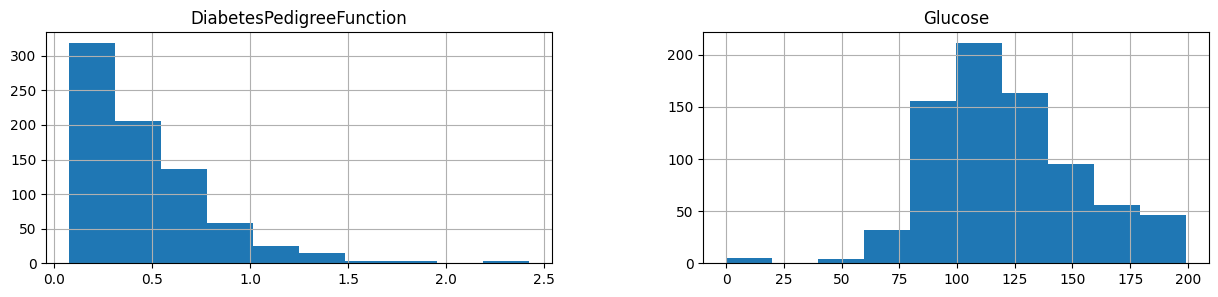

In [671]:
h=df[["DiabetesPedigreeFunction","Glucose"]].hist(figsize=(15,3))

# CSV 파일로 저장하기

In [697]:
df.to_csv("/content/diabetes_feature.csv",index=False)

In [698]:
pd.read_csv("/content/diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 5. 학습, 예측 데이터셋 나누기

In [672]:
split_count=int(df.shape[0]*0.8)
split_count

614

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Pregnancies_high          768 non-null    bool   
 10  Age_low                   768 non-null    bool   
 11  Age_middle                768 non-null    bool   
 12  Age_high                  768 non-null    bool   
 13  Insulin_nan               768 non-null    float64
 14  Insulin_lo

In [674]:
train = df[:split_count].copy()
train.shape

(614, 16)

In [675]:
test = df[split_count:].copy()
test.shape

(154, 16)

In [676]:
train[train["Insulin_nan"]<500].shape

(607, 16)

In [677]:
train = train[train["Insulin_nan"]<600]
train.shape

(610, 16)

In [678]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

In [679]:
label_name = "Outcome"
label_name

'Outcome'

In [680]:
#학습에 사용할 데이터 셋 예) 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [681]:
# 정답값
y_train= train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [682]:
# 예측에 사용할 데이터세트 예) 실전시험문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [683]:
# 예측의 정답값 에) 실전시험문제 정답값
y_test= test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [684]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [685]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [686]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

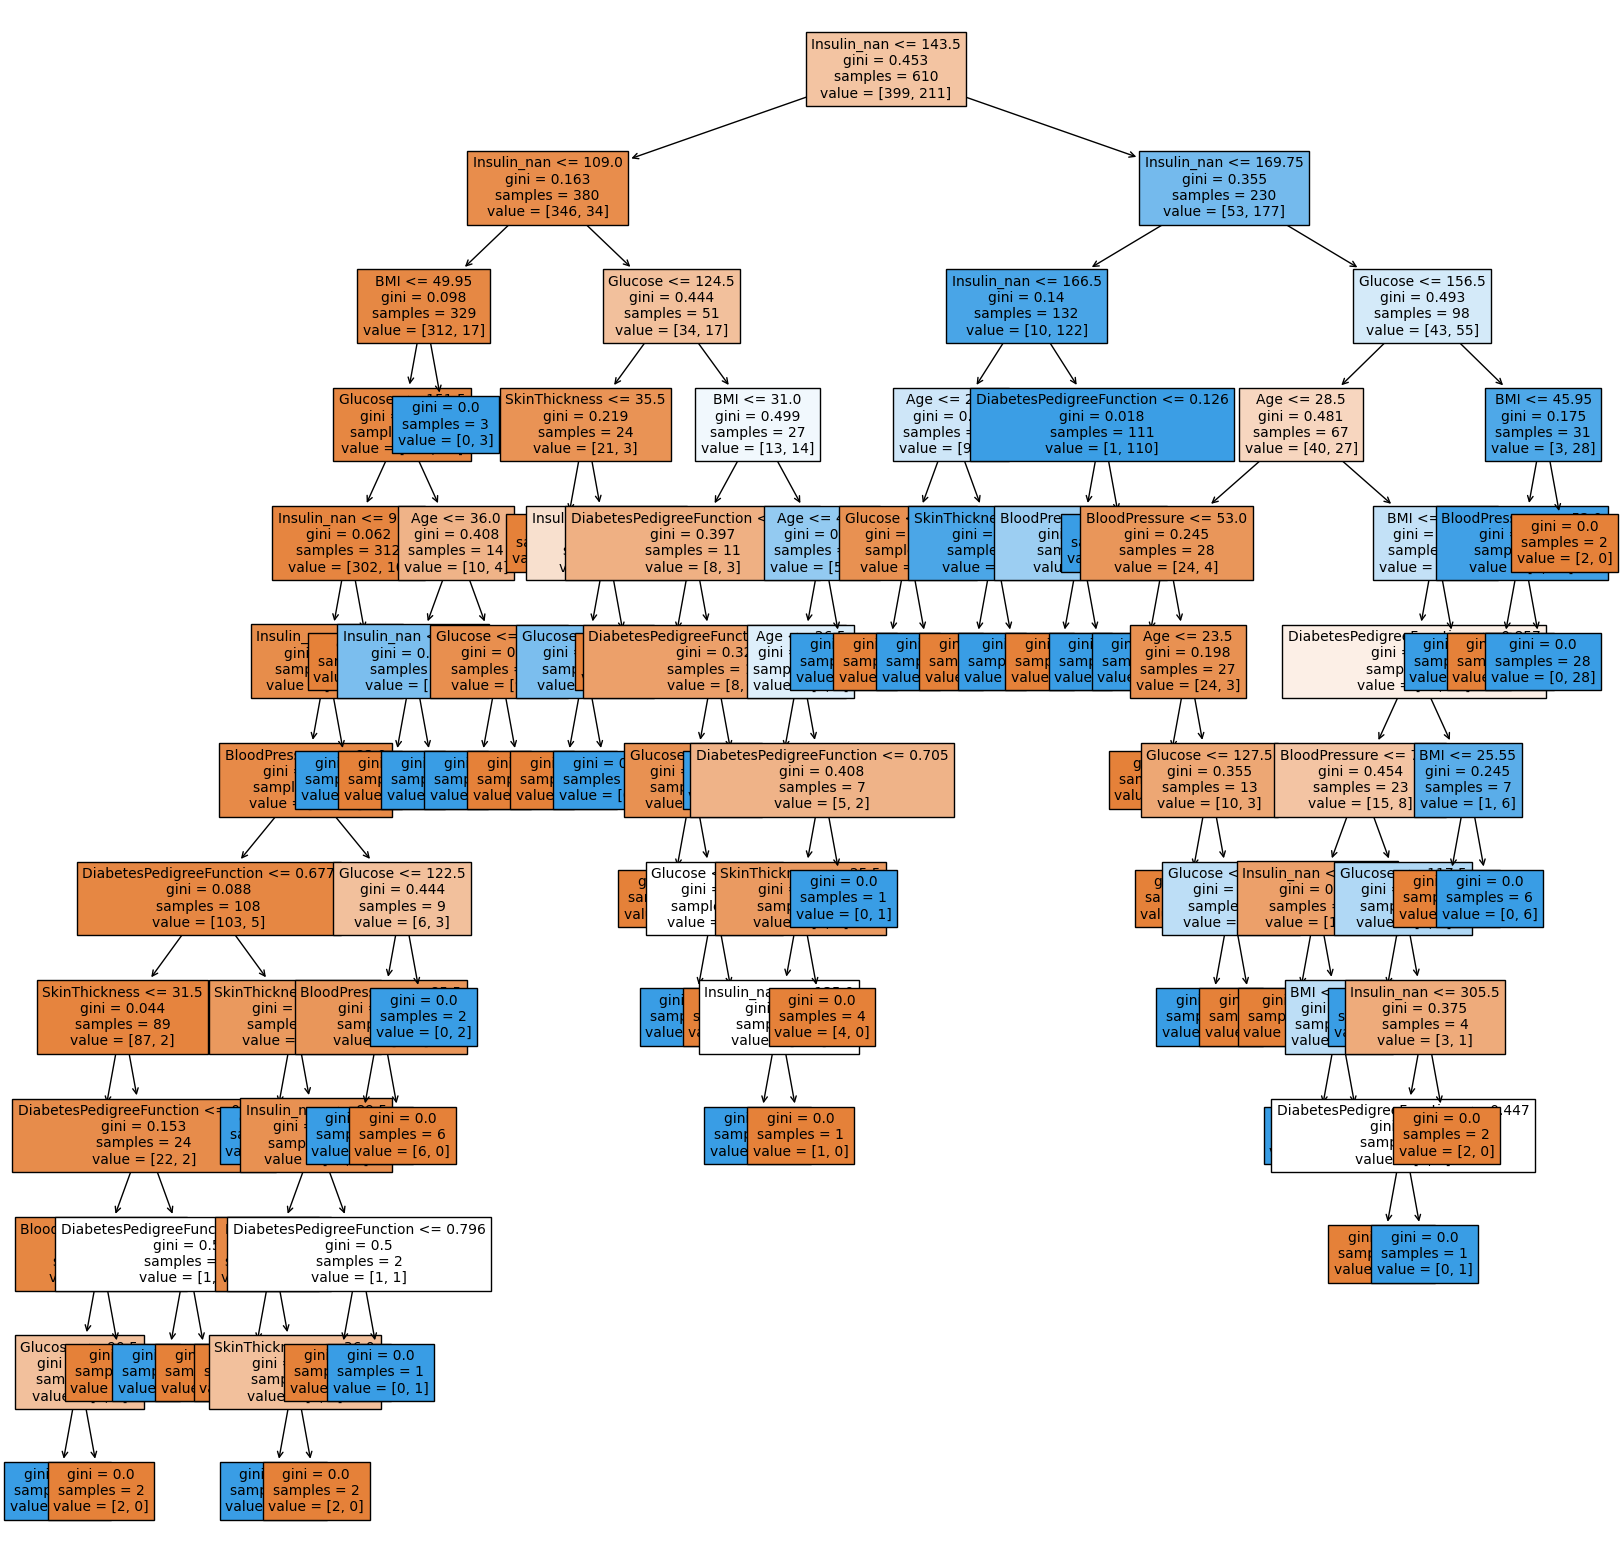

In [687]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model,
         feature_names=feature_names,
                 filled=True, fontsize=10)

In [688]:
model.feature_importances_

array([0.12175004, 0.0374306 , 0.02679164, 0.0716271 , 0.04181117,
       0.07366808, 0.        , 0.62692137, 0.        ])

<Axes: >

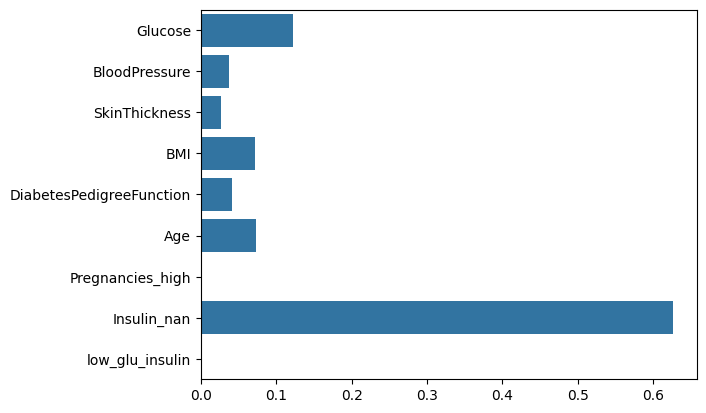

In [689]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [690]:
diff_count = abs(y_test -y_predict).sum()
diff_count

19

In [691]:
(len(y_test) - diff_count) /len(y_test) * 100

87.66233766233766

In [692]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

87.66233766233766

In [693]:
model.score(X_test,y_test) *100

87.66233766233766